In [1]:
import category_encoders as ce
import pandas as pd
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
fc=pd.read_csv(r"C:\Users\Vish\Desktop\ExcelR\Assignments\10. Decision Trees\Fraud_check.csv")
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# checking for null values
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
fc1 = encoder.fit_transform(fc)

In [6]:
# Converting the Target column i.e. Taxable Income into Categorical value 
tax_val = []
for value in fc["Taxable.Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
fc1["tax_val"]= tax_val

In [7]:
fc1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good


# EDA

In [46]:
fc.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [48]:
fc['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [49]:
fc.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [50]:
y.value_counts()

Good     476
Risky    124
Name: tax_val, dtype: int64

# Categorical Varibles with respect to Target (tax_val)

<IPython.core.display.Javascript object>

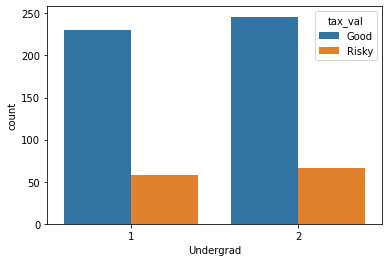

In [53]:
#plot for Undergrad
sns.countplot(x='Undergrad', hue='tax_val' ,data=fc1)

<IPython.core.display.Javascript object>

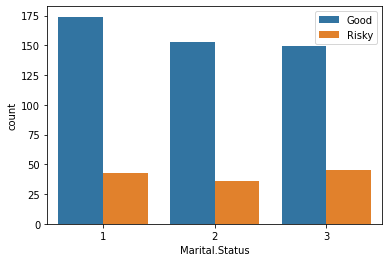

In [55]:
#plot for Marital Status
sns.countplot(x='Marital.Status',hue=tax_val, data=fc1)

<IPython.core.display.Javascript object>

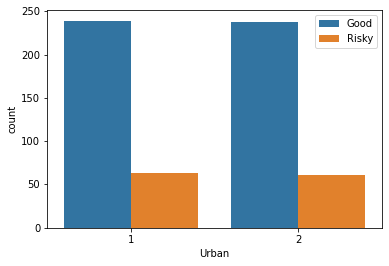

In [56]:
#plot for Urban
sns.countplot(x='Urban',hue=tax_val, data=fc1)

<IPython.core.display.Javascript object>

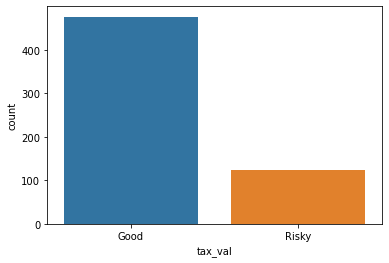

In [57]:
#plot for tax_val

sns.countplot(x='tax_val', data=fc1)

We can see that the percentage of people with good taxable income are more.

# Splitting Dataset

In [8]:
x = fc1.drop(['tax_val','Taxable.Income'], axis =1)
y = fc1['tax_val']

# Random Forest Classification

In [42]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=20)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

74.33333333333334


Lets use the various ensemble techniques to check the accuracy %

# Bagging

In [41]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, x, y, cv=kfold)
print(results1.mean()*100)

73.50000000000001


# Boosting

In [40]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, x, y, cv=kfold)
print(results2.mean()*100)

77.00000000000001


# Stacking

In [ ]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Iteration-1

In [43]:
# create the sub models
estimators = []
model3 = LogisticRegression(max_iter=600)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))
model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))
model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, x, y, cv=kfold)
print(results3.mean()*100)

78.33333333333334


# Iteration-2

In [37]:
# create the sub models
estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))
model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))
model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))
model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, x, y, cv=kfold)
print(results4.mean()*100)

78.33333333333334


# Iteration-3

In [36]:
# create the sub models
estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))
model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))
model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble modSel
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, x, y, cv=kfold)
print(results5.mean()*100)

78.5


# Iteration-4

In [35]:
# create the sub models
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))
model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, x, y, cv=kfold)
print(results6.mean()*100)

78.33333333333334


# Iteration-5

In [33]:
# create the sub models
estimators = []
model17 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model17))
model18 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model18))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, x, y, cv=kfold)
print(results6.mean()*100)

79.33333333333333


# Iteration-6

In [38]:
# create the sub models
estimators = []
model19 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model19))
model20 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model20))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results7 = cross_val_score(ensemble, x, y, cv=kfold)
print(results7.mean()*100)

78.16666666666667


# Insights

+ Stacking Iter-5 gave us 79%
+ Random Forest gave us 74%
+ Bagging gave us 73%
+ Boosting gave us 77% 


So we can consider our final model with stacking iteration-5 with **79%** Accuracy.